In [11]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
'''
def read_data():
    data_path='Data/';
    data = os.listdir(data_path);
    for file in data:
        with open(os.path.join(data_path,file),newline='',encoding="utf-8") as f:
            rows=csv.reader(f);
            if(file=='train_1.csv'):
                train=[]
                for row in rows:
                    try:
                        train.append(int(row));
                    except:
                        0;
    return train;
'''

In [22]:
#train=read_data();

In [85]:
data_path='Data/';
data = os.listdir(data_path);
for files in data:
    with open(os.path.join(data_path,files),newline='',encoding="utf-8") as f:
        #print(f);
        rows=csv.reader(f, delimiter=',');
        if(files=='train_1.csv'):
            train=[];
            line_count = 0;
            for row in rows:
                if line_count == 0:
                    #print('Column names are {", ".join(row)}');
                    line_count += 1;
                else:
                    train.append([row[0],row[1:]]);

In [5]:
page_index=0;
missing_element=np.zeros(len(train));
for page in train:
    date_index=0;
    #print(page[0]);
    for view in page[1]:
        if(view==""):
            #print('found empty element');
            #train[page_index][date_index]=-1;
            missing_element[page_index]+=1;
        date_index+=1;    
    page_index+=1

27786
145063


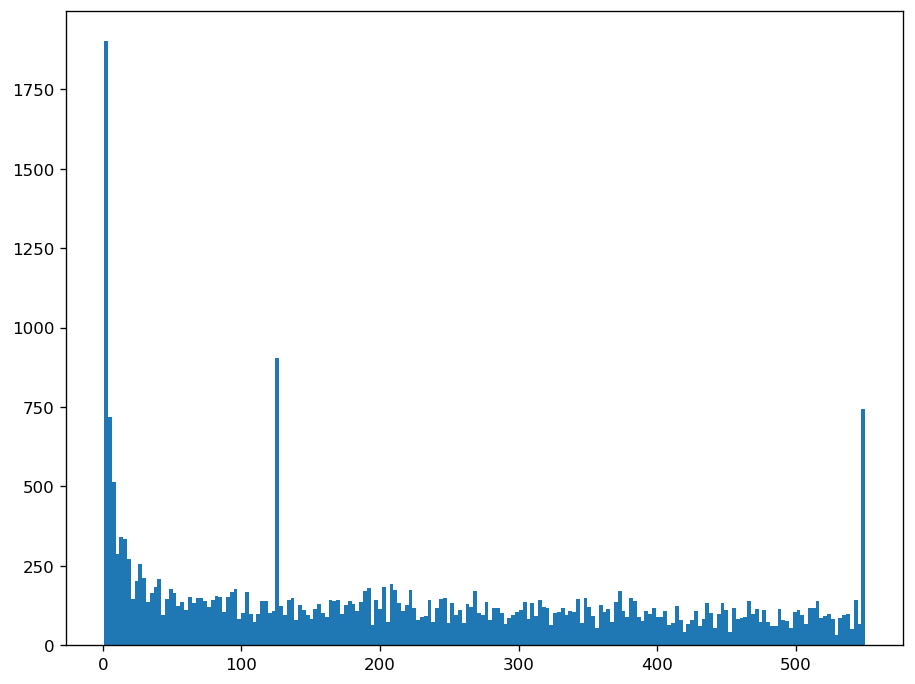

In [9]:
lost=0;
for i in missing_element:
    if i!=0:
        lost+=1;
print(lost);
print(np.size(missing_element));
plt.hist(missing_element,bins=200,range=(1,550));

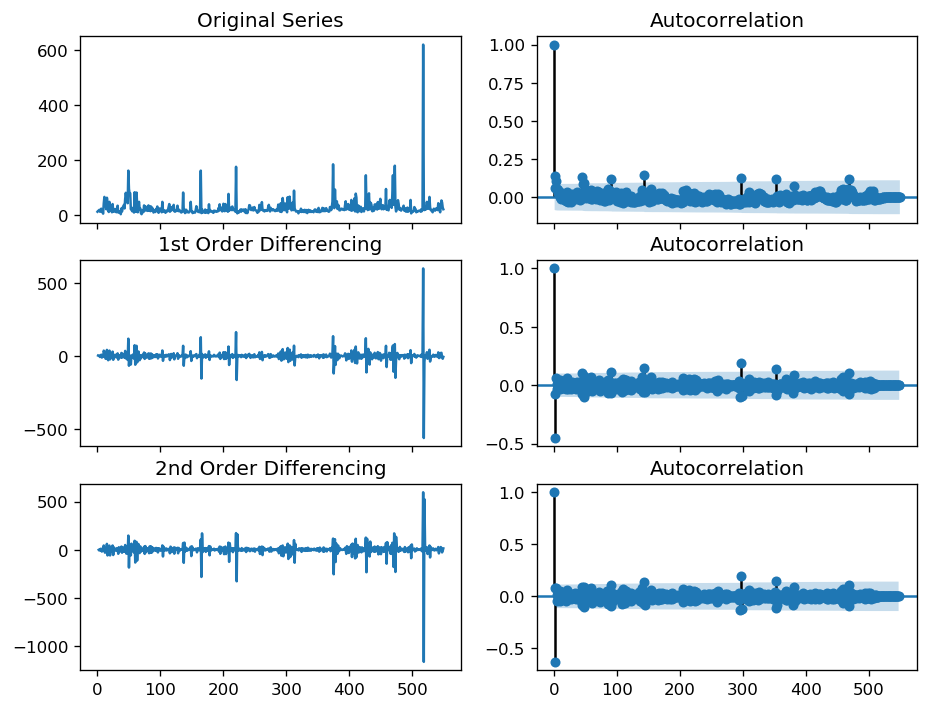

In [86]:

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data : Internet Usage per Minute
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df = pd.DataFrame(train[1][1],columns=['value'])
df.value=df.value.astype(int);
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [92]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,2 ARIMA Model
model = ARIMA(df.value, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  550
Model:                     ARMA(1, 1)   Log Likelihood               -2711.174
Method:                       css-mle   S.D. of innovations             33.462
Date:                Thu, 10 Dec 2020   AIC                           5430.348
Time:                        13:34:30   BIC                           5447.588
Sample:                             0   HQIC                          5437.085
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.3711      2.111     12.016      0.000      21.233      29.509
ar.L1.value     0.7768      0.118      6.576      0.000       0.545       1.008
ma.L1.value    -0.6688      0.139     -4.795    

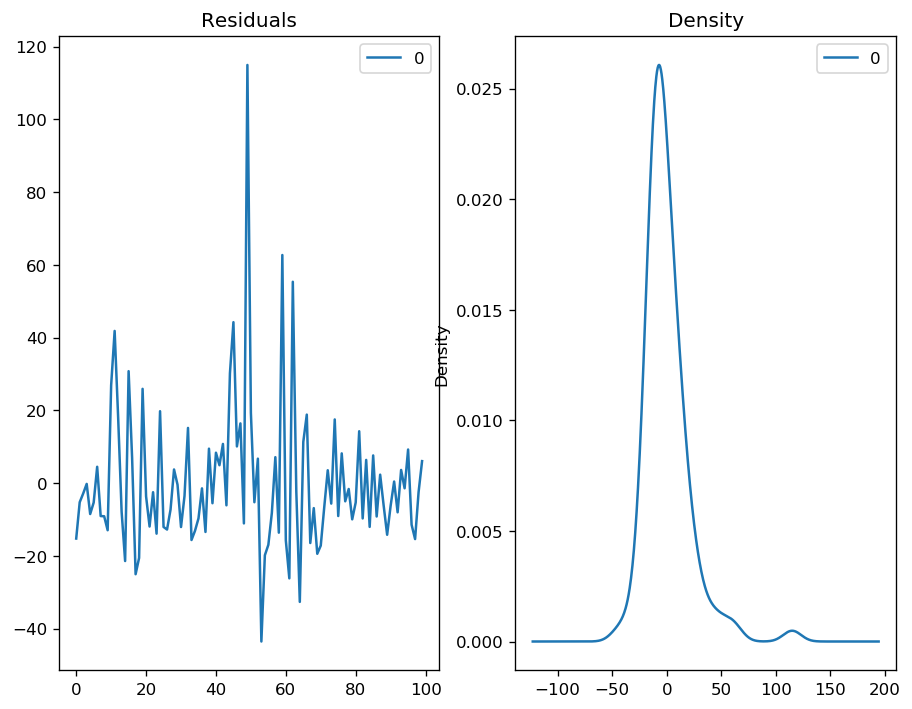

In [80]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

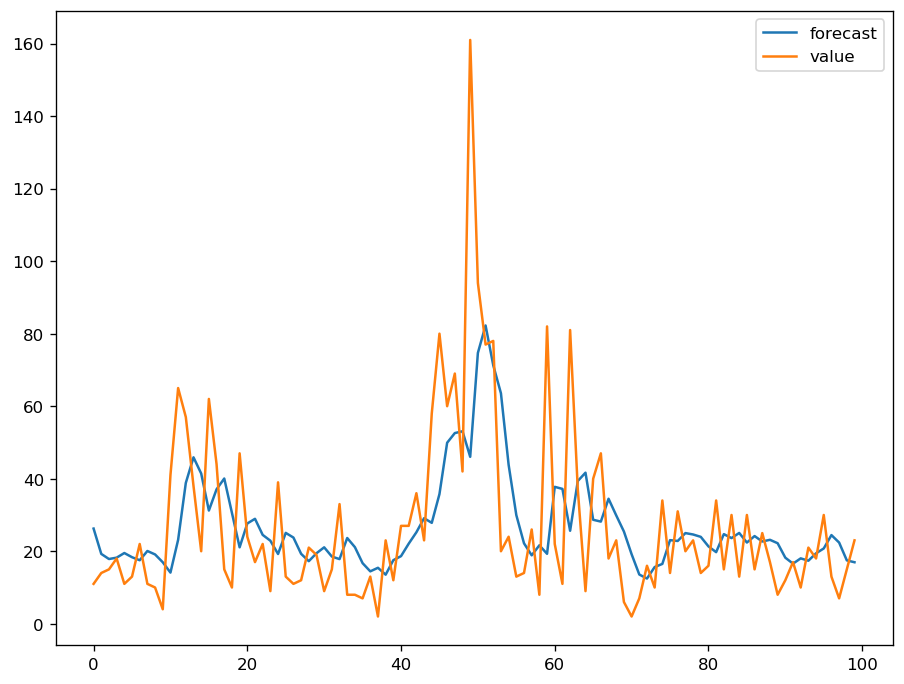

In [81]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\User\AppData\Local\conda\conda\envs\tfp3.6\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\User\AppData\Local\conda\conda\envs\tfp3.6\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


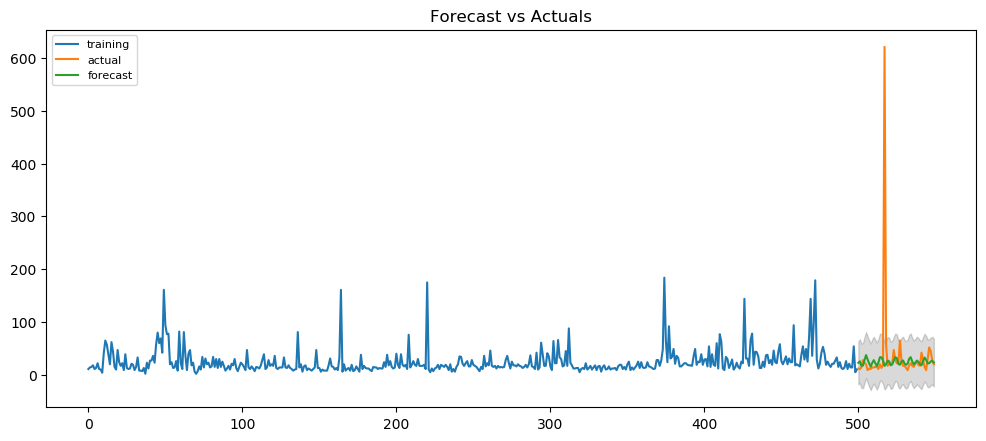

In [94]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train0 = df.value[:500]
test = df.value[500:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train0, order=(10, 0, 10))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train0, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [87]:
len(train[1][1])

550